## Timm Resnets

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [2]:
series = 46
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "resnet-human"
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
results.columns

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [4]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 4,
    'cpu_request': ['1', '2', '4', '8', '16', '32'],
    'data_type': 'image',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['20Gi'],
    'mode': 'step',
    'model_variants': ['resnet18'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 1,
    'replicas': [1],
    'series': 46,
    'series_meta': 'testing mlserver performance with grpc against other '
                   'servers 1,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ '
                   '2.60GHz',
    'timeout': 180,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


,model_variant,max_batch_size,cpu_request,load,model_latencies_max,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,1,3.236415,2.826133,54.230237,1.289335
1,resnet18,1,2,1,2.227280,2.048117,70.180204,0.921139
2,resnet18,1,4,1,0.495512,0.484963,41.359065,0.148692
3,resnet18,1,8,1,0.151468,0.094098,27.437177,0.032459
4,resnet18,1,16,1,0.065209,0.062366,26.770908,0.031006


Text(0, 0.5, 'Latency (seconds)')

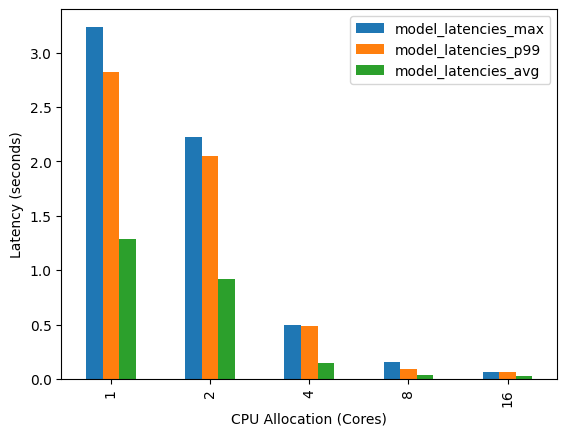

In [5]:
experiment_ids = key_config_df[
    (key_config_df["model_variant"] == "resnet18") & (key_config_df["load"] == 1)
]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_max",
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
ax = output.plot.bar(
    x="cpu_request",
    y=["model_latencies_max", "model_latencies_p99", "model_latencies_avg"],
)
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,2.826133,54.230237,1.289335
1,resnet18,1,2,2.048117,70.180204,0.921139
2,resnet18,1,4,0.484963,41.359065,0.148692
3,resnet18,1,8,0.094098,27.437177,0.032459
4,resnet18,1,16,0.062366,26.770908,0.031006


Text(0, 0.5, 'Latency (seconds)')

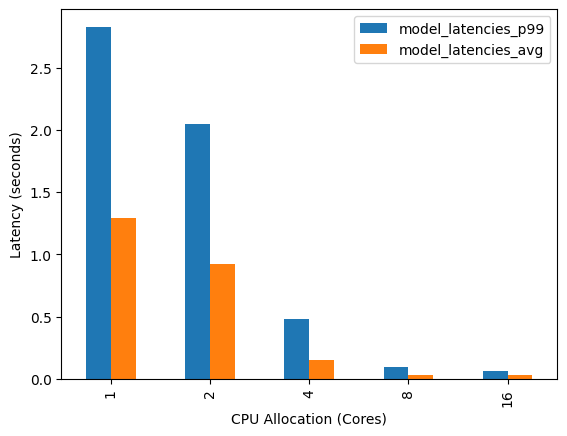

In [6]:
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
ax = output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")